#### Finding matching park with taxi zone

In [1]:
import geopandas as gpd
import pandas as pd
import folium 
import matplotlib.pyplot as plt
import mapclassify

manhattan_parks_gdf = gpd.read_file("filtered_parks_50%.geojson")
#manhattan_taxi_zones_gdf = gpd.read_file("manhattan_taxi_zones.geojson")


In [2]:
manhattan_parks_gdf.head()

,park_id,park_name,park_area,geometry
0,way/225190397,"1 E 99th St, New York, NY 10029, USA",2312.951562,"POLYGON ((-73.94311 40.78519, -73.94277 40.785..."
1,way/22904239,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743..."
2,way/918302837,"165 West End Ave, New York, NY 10023, USA",7290.827044,"POLYGON ((-73.98799 40.77703, -73.98771 40.776..."
3,way/225173496,"175 E 128th St, New York, NY 10035, USA",1952.314196,"POLYGON ((-73.93415 40.80673, -73.93437 40.806..."
4,way/588483880,"2328 Amsterdam Ave, New York, NY 10033, USA",3261.820758,"POLYGON ((-73.93282 40.84516, -73.93345 40.844..."


In [3]:
manhattan_parks_gdf.columns

Index(['park_id', 'park_name', 'park_area', 'geometry'], dtype='object')

In [4]:
manhattan_parks_gdf['park_name'].duplicated().sum()

0

In [5]:
# Create a new custom index column
#manhattan_parks_gdf['custom_index'] = ['PK' + str(i + 1) for i in range(len(unique_parks_gdf))]

In [6]:
manhattan_parks_gdf['park_id']= ['PK' + str(i + 1) for i in range(len(manhattan_parks_gdf))]

In [7]:
park_id_to_drop = ['PK1', 'PK13', 'PK3', 'PK20', 'PK21', 'PK23', 'PK4', 'PK19', 'PK5', 'PK12', 'PK8', 'PK9', 'PK7', 'PK6', 'PK22', 'PK14', 'PK16','PK15','PK10']

manhattan_parks_gdf = manhattan_parks_gdf[~manhattan_parks_gdf['park_id'].isin(park_id_to_drop)]


In [8]:
manhattan_parks_gdf

,park_id,park_name,park_area,geometry
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743..."
10,PK11,"405-425 Main St, New York, NY 10044, USA",11391.099689,"POLYGON ((-73.95357 40.75765, -73.95358 40.757..."
16,PK17,"500 Main St, New York, NY 10044, USA",11157.760542,"POLYGON ((-73.95088 40.76080, -73.95133 40.760..."
17,PK18,"629 W Rd, New York, NY 10044, USA",2386.720832,"POLYGON ((-73.95219 40.76044, -73.95219 40.760..."
23,PK24,Abraham Lincoln Playground,4325.672818,"POLYGON ((-73.93678 40.81182, -73.93653 40.812..."
...,...,...,...,...
219,PK220,West Harlem Piers Park,11663.836242,"POLYGON ((-73.95982 40.82030, -73.96000 40.820..."
220,PK221,West Thames Park,8692.216750,"POLYGON ((-74.01521 40.70972, -74.01524 40.709..."
221,PK222,White Playground,2687.954346,"POLYGON ((-73.94603 40.79199, -73.94602 40.791..."
222,PK223,William E. Passannante Ballfield,2361.134289,"POLYGON ((-74.00235 40.72893, -74.00260 40.728..."


In [9]:
manhattan_parks_gdf.value_counts().sum()

205

#### Find duplicated park names

In [10]:
import geopandas as gpd

# Identify duplicated park names
duplicated_parks = manhattan_parks_gdf[manhattan_parks_gdf['park_name'].duplicated(keep=False)]

# Get unique names of duplicated parks
duplicated_park_names = duplicated_parks['park_name'].unique()

# Display the duplicated park names
print("Duplicated Park Names:")
print(duplicated_park_names)

# Optionally, display the rows with duplicated park names
print("\nRows with Duplicated Park Names:")
print(duplicated_parks)

Duplicated Park Names:
[]

Rows with Duplicated Park Names:
Empty GeoDataFrame
Columns: [park_id, park_name, park_area, geometry]
Index: []


In [11]:
manhattan_parks_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
manhattan_parks_gdf.head()

,park_id,park_name,park_area,geometry
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743..."
10,PK11,"405-425 Main St, New York, NY 10044, USA",11391.099689,"POLYGON ((-73.95357 40.75765, -73.95358 40.757..."
16,PK17,"500 Main St, New York, NY 10044, USA",11157.760542,"POLYGON ((-73.95088 40.76080, -73.95133 40.760..."
17,PK18,"629 W Rd, New York, NY 10044, USA",2386.720832,"POLYGON ((-73.95219 40.76044, -73.95219 40.760..."
23,PK24,Abraham Lincoln Playground,4325.672818,"POLYGON ((-73.93678 40.81182, -73.93653 40.812..."


In [13]:
busyness_taxizones= gpd.read_file("yellow_taxi_busyness_details_hourly1.geojson")

In [14]:
#manhattan_parks_gdf= manhattan_parks_gdf.to_crs(epsg=4326)
busyness_taxizones=busyness_taxizones.to_crs(epsg=32618)

In [15]:
busyness_taxizones.crs

<Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamaica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
# Calculate area taxi zones
busyness_taxizones['taxi_zone_area'] = busyness_taxizones.geometry.area

In [17]:
busyness_taxizones.head(5)

,location_id,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,zone,geometry,taxi_zone_area
0,100,2022,1,1,10,5,True,Winter,True,6,Garment District,"MULTIPOLYGON (((585491.231 4511548.637, 585451...",351170.494667
1,100,2022,1,1,11,5,True,Winter,True,9,Garment District,"MULTIPOLYGON (((585491.231 4511548.637, 585451...",351170.494667
2,100,2022,1,1,12,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((585491.231 4511548.637, 585451...",351170.494667
3,100,2022,1,1,16,5,True,Winter,True,24,Garment District,"MULTIPOLYGON (((585491.231 4511548.637, 585451...",351170.494667
4,100,2022,1,1,17,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((585491.231 4511548.637, 585451...",351170.494667


Change busyness_taxizone CRS back to 4326 to spatial join

In [18]:
busyness_taxizones=busyness_taxizones.to_crs(epsg=4326)

In [19]:
manhattan_parks_gdf=manhattan_parks_gdf.to_crs(epsg=4326)

In [20]:
busyness_taxizones=busyness_taxizones.rename(columns={'location_id':'taxi_zone_id','passenger_count_number':'taxi_zone_busyness'})

In [21]:
busyness_taxizones=busyness_taxizones.rename(columns={'zone':'taxi_zone'})

In [22]:
busyness_taxizones.head()

,taxi_zone_id,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone,geometry,taxi_zone_area
0,100,2022,1,1,10,5,True,Winter,True,6,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667
1,100,2022,1,1,11,5,True,Winter,True,9,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667
2,100,2022,1,1,12,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667
3,100,2022,1,1,16,5,True,Winter,True,24,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667
4,100,2022,1,1,17,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667


In [23]:
manhattan_parks_gdf.head()

,park_id,park_name,park_area,geometry
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743..."
10,PK11,"405-425 Main St, New York, NY 10044, USA",11391.099689,"POLYGON ((-73.95357 40.75765, -73.95358 40.757..."
16,PK17,"500 Main St, New York, NY 10044, USA",11157.760542,"POLYGON ((-73.95088 40.76080, -73.95133 40.760..."
17,PK18,"629 W Rd, New York, NY 10044, USA",2386.720832,"POLYGON ((-73.95219 40.76044, -73.95219 40.760..."
23,PK24,Abraham Lincoln Playground,4325.672818,"POLYGON ((-73.93678 40.81182, -73.93653 40.812..."


In [24]:
manhattan_parks_gdf= manhattan_parks_gdf.to_crs(epsg=4326)

#### Spatial join the parks with taxi zone

In [25]:
# Perform a spatial join to find parks within each taxi zone
parks_with_zones = gpd.sjoin(manhattan_parks_gdf, busyness_taxizones, how='inner', predicate='intersects')

print(parks_with_zones[['park_name', 'taxi_zone_id']])


            park_name taxi_zone_id
1    14th Street Park          246
1    14th Street Park          246
1    14th Street Park          246
1    14th Street Park          246
1    14th Street Park          246
..                ...          ...
223     Zuccotti Park          261
223     Zuccotti Park          261
223     Zuccotti Park          261
223     Zuccotti Park          261
223     Zuccotti Park          261

[386714 rows x 2 columns]


In [26]:
print(parks_with_zones.columns)

Index(['park_id', 'park_name', 'park_area', 'geometry', 'index_right',
       'taxi_zone_id', 'year', 'month', 'day', 'hour', 'day_of_week',
       'weekend', 'season', 'isHoliday?', 'taxi_zone_busyness', 'taxi_zone',
       'taxi_zone_area'],
      dtype='object')


In [27]:
parks_with_zones.shape

(386714, 17)

In [28]:
e= parks_with_zones.nunique()
e

park_id                 191
park_name               191
park_area               191
geometry                191
index_right           94693
taxi_zone_id             56
year                      1
month                    12
day                      31
hour                     24
day_of_week               7
weekend                   2
season                    4
isHoliday?                2
taxi_zone_busyness      125
taxi_zone                56
taxi_zone_area           56
dtype: int64

In [29]:
busyness_taxizones.head()

,taxi_zone_id,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone,geometry,taxi_zone_area
0,100,2022,1,1,10,5,True,Winter,True,6,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667
1,100,2022,1,1,11,5,True,Winter,True,9,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667
2,100,2022,1,1,12,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667
3,100,2022,1,1,16,5,True,Winter,True,24,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667
4,100,2022,1,1,17,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ...",351170.494667


In [30]:
parks_with_zones.head()

,park_id,park_name,park_area,geometry,index_right,taxi_zone_id,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone,taxi_zone_area
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80995,246,2022,7,24,2,6,True,Summer,False,21,West Chelsea/Hudson Yards,1.193142e+06
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80996,246,2022,7,24,3,6,True,Summer,False,3,West Chelsea/Hudson Yards,1.193142e+06
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80997,246,2022,7,25,10,0,False,Summer,False,16,West Chelsea/Hudson Yards,1.193142e+06
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80998,246,2022,7,25,11,0,False,Summer,False,18,West Chelsea/Hudson Yards,1.193142e+06
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80999,246,2022,7,25,12,0,False,Summer,False,2,West Chelsea/Hudson Yards,1.193142e+06


#### Calculating remaining taxi zone area

In [31]:
# Calculate the remaining area of the taxi zone
parks_with_zones['remaining_taxi_zone_area'] = parks_with_zones['taxi_zone_area'] - parks_with_zones['park_area']

# Calculate the proportion of the taxi zone area that is covered by the park
parks_with_zones['park_proportion'] = parks_with_zones['park_area'] / parks_with_zones['taxi_zone_area']

# Calculate the busyness score for the park
parks_with_zones['park_busyness'] = parks_with_zones['park_proportion'] * parks_with_zones['taxi_zone_busyness']

# Display the resulting DataFrame
print(parks_with_zones[['park_name', 'park_id','park_area','taxi_zone_area','park_proportion', 'taxi_zone_busyness','park_busyness']])


            park_name park_id    park_area  taxi_zone_area  park_proportion  \
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
..                ...     ...          ...             ...              ...   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   

     taxi_zone_busyness  park_busyness  
1         

In [32]:
parks_with_zones['normalized_park_busyness'] = parks_with_zones['park_busyness'] / parks_with_zones['park_area']


In [33]:

print(parks_with_zones[['park_name', 'park_id', 'park_area', 'taxi_zone_area', 'park_proportion', 'taxi_zone_busyness', 'park_busyness', 'normalized_park_busyness']])

            park_name park_id    park_area  taxi_zone_area  park_proportion  \
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
..                ...     ...          ...             ...              ...   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   

     taxi_zone_busyness  park_busyness  normalized_

In [34]:

parks_with_zones['park_busyness_percentile'] = parks_with_zones['normalized_park_busyness'].rank(method='min',pct=True) *100 


print(parks_with_zones[['park_name', 'park_id', 'park_area', 'taxi_zone_area', 'park_proportion', 'taxi_zone_busyness', 'park_busyness', 'normalized_park_busyness', 'park_busyness_percentile']])


            park_name park_id    park_area  taxi_zone_area  park_proportion  \
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
1    14th Street Park     PK2  2972.993684    1.193142e+06         0.002492   
..                ...     ...          ...             ...              ...   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   
223     Zuccotti Park   PK224  3439.798590    3.220665e+05         0.010680   

     taxi_zone_busyness  park_busyness  normalized_

In [35]:
parks_with_zones.head()

,park_id,park_name,park_area,geometry,index_right,taxi_zone_id,year,month,day,hour,...,season,isHoliday?,taxi_zone_busyness,taxi_zone,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,normalized_park_busyness,park_busyness_percentile
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80995,246,2022,7,24,2,...,Summer,False,21,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.052326,0.000018,80.082697
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80996,246,2022,7,24,3,...,Summer,False,3,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.007475,0.000003,28.808370
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80997,246,2022,7,25,10,...,Summer,False,16,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.039868,0.000013,73.576855
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80998,246,2022,7,25,11,...,Summer,False,18,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.044851,0.000015,75.790636
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80999,246,2022,7,25,12,...,Summer,False,2,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.004983,0.000002,20.334925


In [36]:
descripton= parks_with_zones.describe()
descripton

,park_area,index_right,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,normalized_park_busyness,park_busyness_percentile
count,3.867140e+05,386714.000000,386714.000000,3.867140e+05,3.867140e+05,386714.000000,386714.000000,386714.000000,386714.000000
mean,6.206599e+04,64913.658448,8.996129,1.121572e+06,1.059506e+06,0.048243,0.360933,0.000011,49.910966
std,2.657243e+05,33679.232161,10.692061,6.676654e+05,6.337622e+05,0.116890,1.394875,0.000015,28.936768
min,1.944321e+03,2043.000000,0.000000,1.011611e+05,1.270659e+04,0.000612,0.000000,0.000000,0.000259
25%,3.024129e+03,31818.000000,2.000000,6.540246e+05,6.122081e+05,0.003100,0.014726,0.000002,24.739730
50%,6.579599e+03,64568.500000,5.000000,9.886531e+05,9.145911e+05,0.008149,0.049311,0.000005,49.906649
75%,2.681967e+04,96399.000000,12.000000,1.478769e+06,1.410285e+06,0.029299,0.199900,0.000014,74.987976
max,3.413739e+06,113820.000000,154.000000,3.556719e+06,3.554541e+06,0.959800,71.985002,0.000259,100.000000


#### Find intersecting parks and taxi zones

In [37]:
parks_with_zones

,park_id,park_name,park_area,geometry,index_right,taxi_zone_id,year,month,day,hour,...,season,isHoliday?,taxi_zone_busyness,taxi_zone,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,normalized_park_busyness,park_busyness_percentile
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80995,246,2022,7,24,2,...,Summer,False,21,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.052326,0.000018,80.082697
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80996,246,2022,7,24,3,...,Summer,False,3,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.007475,0.000003,28.808370
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80997,246,2022,7,25,10,...,Summer,False,16,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.039868,0.000013,73.576855
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80998,246,2022,7,25,11,...,Summer,False,18,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.044851,0.000015,75.790636
1,PK2,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",80999,246,2022,7,25,12,...,Summer,False,2,West Chelsea/Hudson Yards,1.193142e+06,1.190169e+06,0.002492,0.004983,0.000002,20.334925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,PK224,Zuccotti Park,3439.798590,"POLYGON ((-74.01169 40.70955, -74.01184 40.709...",83980,261,2022,12,22,16,...,Winter,False,1,World Trade Center,3.220665e+05,3.186267e+05,0.010680,0.010680,0.000003,35.700026
223,PK224,Zuccotti Park,3439.798590,"POLYGON ((-74.01169 40.70955, -74.01184 40.709...",83981,261,2022,12,22,17,...,Winter,False,6,World Trade Center,3.220665e+05,3.186267e+05,0.010680,0.064082,0.000019,81.189716
223,PK224,Zuccotti Park,3439.798590,"POLYGON ((-74.01169 40.70955, -74.01184 40.709...",83982,261,2022,12,22,18,...,Winter,False,4,World Trade Center,3.220665e+05,3.186267e+05,0.010680,0.042722,0.000012,71.416344
223,PK224,Zuccotti Park,3439.798590,"POLYGON ((-74.01169 40.70955, -74.01184 40.709...",83983,261,2022,12,22,19,...,Winter,False,1,World Trade Center,3.220665e+05,3.186267e+05,0.010680,0.010680,0.000003,35.700026


In [38]:
parks_with_zones_individual=parks_with_zones[parks_with_zones['park_name']== 'East River Waterfront Esplanade']
h= parks_with_zones_individual.describe()
h

,park_area,index_right,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,normalized_park_busyness,park_busyness_percentile
count,7.971000e+03,7971.000000,7971.000000,7.971000e+03,7.971000e+03,7971.000000,7971.000000,7971.000000,7971.000000
mean,4.271457e+04,87939.147033,4.209886,6.059343e+05,5.632197e+05,0.107254,0.442803,0.000010,52.603803
std,7.276414e-12,25988.831760,3.948283,4.438644e+05,4.438644e+05,0.055728,0.494534,0.000012,25.411329
min,4.271457e+04,49116.000000,0.000000,2.434022e+05,2.006876e+05,0.030214,0.000000,0.000000,0.000259
25%,4.271457e+04,60988.500000,1.000000,2.598693e+05,2.171547e+05,0.061750,0.123500,0.000003,33.227915
50%,4.271457e+04,97439.000000,3.000000,3.883466e+05,3.456320e+05,0.109991,0.247000,0.000006,51.076765
75%,4.271457e+04,111827.500000,6.000000,6.917331e+05,6.490185e+05,0.164369,0.549954,0.000013,72.308735
max,4.271457e+04,113820.000000,46.000000,1.413727e+06,1.371013e+06,0.175490,5.059578,0.000118,99.910787


In [39]:
parks_with_zones_individual2=parks_with_zones[parks_with_zones['park_id']== 'PK119']


In [40]:
parks_with_zones_busyness=parks_with_zones[parks_with_zones['park_busyness_percentile']== 100.000000]


In [41]:
parks_with_zones_busyness

,park_id,park_name,park_area,geometry,index_right,taxi_zone_id,year,month,day,hour,...,season,isHoliday?,taxi_zone_busyness,taxi_zone,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,normalized_park_busyness,park_busyness_percentile
86,PK87,Grand Army Plaza,6579.598724,"MULTIPOLYGON (((-73.97371 40.76446, -73.97370 ...",38648,163,2022,12,24,13,...,Winter,False,99,Midtown North,382850.711829,376271.113106,0.017186,1.701395,0.000259,100.0


In [42]:
parks_with_zones_individual['taxi_zone_id'].value_counts()

taxi_zone_id
87     1930
232    1677
88     1584
45     1393
209    1387
Name: count, dtype: int64

In [43]:
parks_with_zones_filtered=parks_with_zones[['park_id','park_name','geometry','year','month','day','hour']]
parks_with_zones_filtered

,park_id,park_name,geometry,year,month,day,hour
1,PK2,14th Street Park,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",2022,7,24,2
1,PK2,14th Street Park,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",2022,7,24,3
1,PK2,14th Street Park,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",2022,7,25,10
1,PK2,14th Street Park,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",2022,7,25,11
1,PK2,14th Street Park,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",2022,7,25,12
...,...,...,...,...,...,...,...
223,PK224,Zuccotti Park,"POLYGON ((-74.01169 40.70955, -74.01184 40.709...",2022,12,22,16
223,PK224,Zuccotti Park,"POLYGON ((-74.01169 40.70955, -74.01184 40.709...",2022,12,22,17
223,PK224,Zuccotti Park,"POLYGON ((-74.01169 40.70955, -74.01184 40.709...",2022,12,22,18
223,PK224,Zuccotti Park,"POLYGON ((-74.01169 40.70955, -74.01184 40.709...",2022,12,22,19


there are 60,062 rows duplicate based on same park id, year, month, day, hour

In [44]:
#checking for duplicated rows
duplicated_rows = parks_with_zones_filtered[parks_with_zones_filtered.duplicated()]

#display duplicate rows
print("Duplicate Rows:")
print(duplicated_rows)


Duplicate Rows:
    park_id               park_name  \
30     PK31            Battery Park   
30     PK31            Battery Park   
30     PK31            Battery Park   
30     PK31            Battery Park   
30     PK31            Battery Park   
..      ...                     ...   
219   PK220  West Harlem Piers Park   
219   PK220  West Harlem Piers Park   
219   PK220  West Harlem Piers Park   
219   PK220  West Harlem Piers Park   
219   PK220  West Harlem Piers Park   

                                              geometry  year month day hour  
30   POLYGON ((-74.01475 40.70160, -74.01452 40.701...  2022    10   7   13  
30   POLYGON ((-74.01475 40.70160, -74.01452 40.701...  2022    10   7   10  
30   POLYGON ((-74.01475 40.70160, -74.01452 40.701...  2022    10  30   12  
30   POLYGON ((-74.01475 40.70160, -74.01452 40.701...  2022    10   3   13  
30   POLYGON ((-74.01475 40.70160, -74.01452 40.701...  2022    10  29   16  
..                                             

In [45]:
parks_taxi_info_datetime_hourly=parks_with_zones

In [46]:
parks_with_zones.columns

Index(['park_id', 'park_name', 'park_area', 'geometry', 'index_right',
       'taxi_zone_id', 'year', 'month', 'day', 'hour', 'day_of_week',
       'weekend', 'season', 'isHoliday?', 'taxi_zone_busyness', 'taxi_zone',
       'taxi_zone_area', 'remaining_taxi_zone_area', 'park_proportion',
       'park_busyness', 'normalized_park_busyness',
       'park_busyness_percentile'],
      dtype='object')

Example of resolve the duplicate issue

In [47]:
EastRiver_data= parks_taxi_info_datetime_hourly[(parks_taxi_info_datetime_hourly['park_id'] == 'relation/16066428') & (parks_taxi_info_datetime_hourly['park_name'] == 'East River Waterfront Esplanade') & ((parks_taxi_info_datetime_hourly['month'] == '10')) & ((parks_taxi_info_datetime_hourly['day'] == '7'))& ((parks_taxi_info_datetime_hourly['hour'] == '14'))]
EastRiver_data

,park_id,park_name,park_area,geometry,index_right,taxi_zone_id,year,month,day,hour,...,season,isHoliday?,taxi_zone_busyness,taxi_zone,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,normalized_park_busyness,park_busyness_percentile


In [48]:
EastRiver_filtered = EastRiver_data[['park_id', 'park_name','park_area','centroid','year','month', 'day', 'hour','day_of_week', 'weekend', 'season', 'isHoliday?','taxi_zone_busyness','taxi_zone_id','taxi_zone','taxi_zone_area','remaining_taxi_zone_area','park_proportion','park_busyness']]
EastRiver_dissolved=EastRiver_filtered.dissolve(by=['park_id','park_name','park_area','year','month','day','hour','day_of_week','weekend','season','isHoliday?'], aggfunc='sum')
EastRiver_dissolved

KeyError: "['centroid'] not in index"

In [ ]:
EastRiver_dissolved=EastRiver_dissolved.reset_index()

In [ ]:
EastRiver_dissolved['taxi_zone_ids']=EastRiver_data.groupby(['park_id', 'park_name','year','month', 'day', 'hour'])['taxi_zone_id'].apply(lambda x:', '.join(x)).reset_index()['taxi_zone_id']
EastRiver_dissolved['taxi_zones']=EastRiver_data.groupby(['park_id', 'park_name','year','month', 'day', 'hour'])['taxi_zone'].apply(lambda x:', '.join(x)).reset_index()['taxi_zone']

EastRiver_dissolved


,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,centroid,taxi_zone_busyness,taxi_zone_id,taxi_zone,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones


In [ ]:
EastRiver_dissolved.drop(['taxi_zone_id','taxi_zone'],axis=1)

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,centroid,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones


#### Now working with all the data

In [ ]:
parks_with_zones_filtered = parks_with_zones[['park_id', 'park_name','park_area','geometry','year','month', 'day', 'hour','day_of_week', 'weekend', 'season', 'isHoliday?','taxi_zone_busyness','taxi_zone_id','taxi_zone','taxi_zone_area','remaining_taxi_zone_area','park_proportion','park_busyness','normalized_park_busyness', 'park_busyness_percentile']]

In [ ]:
# Group by 'park_id' and 'park_name' and apply union_geometry
#filtered_group= parks_with_zones_filtered.groupby(['park_id', 'park_name'])

In [ ]:
#from shapely.ops import unary_union

In [ ]:
#def union_geometry(x):
    #return unary_union(x)



In [ ]:
# Apply union_geometry to each group and combine results
#dissolved_and_unioned = filtered_group['geometry'].apply(lambda geom: union_geometry(geom))

In [ ]:
#dissolved_and_unioned_df = dissolved_and_unioned.reset_index()

In [ ]:
# Merge the unified geometries back with the dissolved DataFrame
#parks_with_zones_filtered = parks_with_zones_filtered.drop(columns='geometry').merge(dissolved_and_unioned_df, on=['park_id', 'park_name'])

In [ ]:
#type(parks_with_zones_filtered)

In [ ]:
parks_with_zones_filtered = gpd.GeoDataFrame(parks_with_zones_filtered, geometry='geometry')

In [ ]:
parks_with_zones_dissolved=parks_with_zones_filtered.dissolve(by=['park_id','park_name','park_area','year','month','day','hour','day_of_week','weekend','season','isHoliday?'], aggfunc='sum')
parks_with_zones_dissolved

geometry  \
park_id park_name                 park_area     year month day hour day_of_week weekend season isHoliday?                                                      
PK101   Inwood Hill Park          784904.717278 2022 1     17  19   0           False   Winter True        POLYGON ((590813.358 4524841.654, 590837.260 4...   
                                                           20  11   3           False   Winter False       POLYGON ((590813.358 4524841.654, 590837.260 4...   
                                                           21  18   4           False   Winter False       POLYGON ((590813.358 4524841.654, 590837.260 4...   
                                                           22  11   5           True    Winter False       POLYGON ((590813.358 4524841.654, 590837.260 4...   
                                                           23  12   6           True    Winter False       POLYGON ((590813.358 4524841.654, 590837.260 4...   
...                                                                                                                                                      ...   
PK98    Howard Bennett Playground 6552.594568   2022 9     9   15   4           False   Autumn False       POLYGON ((589453.336 4518607.522, 589544.926 4...   
                                                               16   4           False   Autumn False       POLYGON ((589453.336 4518607.522, 589544.926 4...   
                                                               19   4           False   Autumn False       POLYGON ((589453.336 4518607.522, 589544.926 4...   
                                                               20   4           False   Autumn False       POLYGON ((589453.336 4518607.522, 589544.926 4...   
                                                               8    4           False   Autumn False       POLYGON ((589453.336 4518607.522, 589544.926 4...   

                                                                                                           taxi_zone_busyness  \
park_id park_name                 park_area     year month day hour day_of_week weekend season isHoliday?                       
PK101   Inwood Hill Park          784904.717278 2022 1     17  19   0           False   Winter True                         0   
                                                           20  11   3           False   Winter False                        1   
                                                           21  18   4           False   Winter False                        1   
                                                           22  11   5           True    Winter False                        2   
                                                           23  12   6           True    Winter False                        1   
...                                                                                                                       ...   
PK98    Howard Bennett Playground 6552.594568   2022 9     9   15   4           False   Autumn False                        3   
                                                               16   4           False   Autumn False                        4   
                                                               19   4           False   Autumn False                        8   
                                                               20   4           False   Autumn False                        1   
                                                               8    4           False   Autumn False                        4   

                                                                                                          taxi_zone_id  \
park_id park_name                 park_area     year month day hour day_of_week weekend season isHoliday?                
PK101   Inwood Hill Park          784904.717278 2022 1     17  19   0           False   Winter True                128   
                       

In [ ]:
parks_with_zones_dissolved= parks_with_zones_dissolved.reset_index()

In [ ]:
parks_with_zones_dissolved['taxi_zone_ids']=parks_with_zones_filtered.groupby(['park_id', 'park_name','year','month', 'day', 'hour'])['taxi_zone_id'].apply(lambda x:', '.join(x)).reset_index()['taxi_zone_id']
parks_with_zones_dissolved['taxi_zones']=parks_with_zones_filtered.groupby(['park_id', 'park_name','year','month', 'day', 'hour'])['taxi_zone'].apply(lambda x:', '.join(x)).reset_index()['taxi_zone']


KeyboardInterrupt: 

In [ ]:
parks_with_zones_dissolved

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,geometry,taxi_zone_busyness,taxi_zone_id,taxi_zone,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones
0,PK101,Inwood Hill Park,784904.717278,2022,1,17,19,0,False,Winter,...,"POLYGON ((590813.358 4524841.654, 590837.260 4...",0,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,0.000000,128,Inwood Hill Park
1,PK101,Inwood Hill Park,784904.717278,2022,1,20,11,3,False,Winter,...,"POLYGON ((590813.358 4524841.654, 590837.260 4...",1,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park
2,PK101,Inwood Hill Park,784904.717278,2022,1,21,18,4,False,Winter,...,"POLYGON ((590813.358 4524841.654, 590837.260 4...",1,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park
3,PK101,Inwood Hill Park,784904.717278,2022,1,22,11,5,True,Winter,...,"POLYGON ((590813.358 4524841.654, 590837.260 4...",2,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,1.693601,128,Inwood Hill Park
4,PK101,Inwood Hill Park,784904.717278,2022,1,23,12,6,True,Winter,...,"POLYGON ((590813.358 4524841.654, 590837.260 4...",1,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315072,PK98,Howard Bennett Playground,6552.594568,2022,9,9,15,4,False,Autumn,...,"POLYGON ((589453.336 4518607.522, 589544.926 4...",3,42,Central Harlem North,2.358459e+06,2.351906e+06,0.002778,0.008335,42,Central Harlem North
315073,PK98,Howard Bennett Playground,6552.594568,2022,9,9,16,4,False,Autumn,...,"POLYGON ((589453.336 4518607.522, 589544.926 4...",4,42,Central Harlem North,2.358459e+06,2.351906e+06,0.002778,0.011113,42,Central Harlem North
315074,PK98,Howard Bennett Playground,6552.594568,2022,9,9,19,4,False,Autumn,...,"POLYGON ((589453.336 4518607.522, 589544.926 4...",8,42,Central Harlem North,2.358459e+06,2.351906e+06,0.002778,0.022227,42,Central Harlem North
315075,PK98,Howard Bennett Playground,6552.594568,2022,9,9,20,4,False,Autumn,...,"POLYGON ((589453.336 4518607.522, 589544.926 4...",1,42,Central Harlem North,2.358459e+06,2.351906e+06,0.002778,0.002778,42,Central Harlem North


In [ ]:
parks_with_zones_before_dissolve=parks_with_zones_filtered.nunique()
parks_with_zones_before_dissolve

park_id                      185
park_name                    185
park_area                    185
geometry                     185
year                           1
month                         12
day                           31
hour                          24
day_of_week                    7
weekend                        2
season                         4
isHoliday?                     2
taxi_zone_busyness           125
taxi_zone_id                  56
taxi_zone                     56
taxi_zone_area                56
remaining_taxi_zone_area     185
park_proportion              185
park_busyness               7623
dtype: int64

In [ ]:
parks_with_zones_after_dissolve= parks_with_zones_dissolved.nunique()
parks_with_zones_after_dissolve

park_id                      185
park_name                    185
park_area                    185
year                           1
month                         12
day                           31
hour                          24
day_of_week                    7
weekend                        2
season                         4
isHoliday?                     2
geometry                     185
taxi_zone_busyness           125
taxi_zone_id                  56
taxi_zone                     56
taxi_zone_area                56
remaining_taxi_zone_area     185
park_proportion              185
park_busyness               7623
taxi_zone_ids                 56
taxi_zones                    56
dtype: int64

Due to the nature of dissolve(), duplicate geometries might occur due to slight precision issues, need to use unary_union()

In [ ]:

grouped = parks_with_zones_dissolved.groupby(['park_id', 'park_name'])

In [ ]:
from shapely.ops import unary_union

In [ ]:
def union_geometry(x):
    return unary_union(x)



In [ ]:
# Apply union_geometry to each group and combine results
dissolved_and_unioned = grouped['geometry'].apply(lambda geom: union_geometry(geom))

In [ ]:
dissolved_and_unioned_df = dissolved_and_unioned.reset_index()

In [ ]:
# Merge the unified geometries back with the dissolved DataFrame
parks_with_zones_dissolved = parks_with_zones_dissolved.drop(columns='geometry').merge(dissolved_and_unioned_df, on=['park_id', 'park_name'])

In [ ]:
parks_with_zones_dissolved.nunique()


park_id                      185
park_name                    185
park_area                    185
year                           1
month                         12
day                           31
hour                          24
day_of_week                    7
weekend                        2
season                         4
isHoliday?                     2
taxi_zone_busyness           125
taxi_zone_id                  56
taxi_zone                     56
taxi_zone_area                56
remaining_taxi_zone_area     185
park_proportion              185
park_busyness               7623
taxi_zone_ids                 56
taxi_zones                    56
geometry                     185
dtype: int64

In [ ]:
parks_with_zones_dissolved

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_busyness,taxi_zone_id,taxi_zone,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
0,PK101,Inwood Hill Park,784904.717278,2022,1,17,19,0,False,Winter,...,0,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,0.000000,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK101,Inwood Hill Park,784904.717278,2022,1,20,11,3,False,Winter,...,1,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
2,PK101,Inwood Hill Park,784904.717278,2022,1,21,18,4,False,Winter,...,1,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
3,PK101,Inwood Hill Park,784904.717278,2022,1,22,11,5,True,Winter,...,2,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,1.693601,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
4,PK101,Inwood Hill Park,784904.717278,2022,1,23,12,6,True,Winter,...,1,128,Inwood Hill Park,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315072,PK98,Howard Bennett Playground,6552.594568,2022,9,9,15,4,False,Autumn,...,3,42,Central Harlem North,2.358459e+06,2.351906e+06,0.002778,0.008335,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315073,PK98,Howard Bennett Playground,6552.594568,2022,9,9,16,4,False,Autumn,...,4,42,Central Harlem North,2.358459e+06,2.351906e+06,0.002778,0.011113,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315074,PK98,Howard Bennett Playground,6552.594568,2022,9,9,19,4,False,Autumn,...,8,42,Central Harlem North,2.358459e+06,2.351906e+06,0.002778,0.022227,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315075,PK98,Howard Bennett Playground,6552.594568,2022,9,9,20,4,False,Autumn,...,1,42,Central Harlem North,2.358459e+06,2.351906e+06,0.002778,0.002778,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."


In [ ]:
parks_with_zones_dissolved=parks_with_zones_dissolved.drop(['taxi_zone','taxi_zone_id'], axis=1)
parks_with_zones_dissolved

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
0,PK101,Inwood Hill Park,784904.717278,2022,1,17,19,0,False,Winter,True,0,9.269065e+05,1.420018e+05,0.846800,0.000000,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK101,Inwood Hill Park,784904.717278,2022,1,20,11,3,False,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
2,PK101,Inwood Hill Park,784904.717278,2022,1,21,18,4,False,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
3,PK101,Inwood Hill Park,784904.717278,2022,1,22,11,5,True,Winter,False,2,9.269065e+05,1.420018e+05,0.846800,1.693601,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
4,PK101,Inwood Hill Park,784904.717278,2022,1,23,12,6,True,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315072,PK98,Howard Bennett Playground,6552.594568,2022,9,9,15,4,False,Autumn,False,3,2.358459e+06,2.351906e+06,0.002778,0.008335,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315073,PK98,Howard Bennett Playground,6552.594568,2022,9,9,16,4,False,Autumn,False,4,2.358459e+06,2.351906e+06,0.002778,0.011113,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315074,PK98,Howard Bennett Playground,6552.594568,2022,9,9,19,4,False,Autumn,False,8,2.358459e+06,2.351906e+06,0.002778,0.022227,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315075,PK98,Howard Bennett Playground,6552.594568,2022,9,9,20,4,False,Autumn,False,1,2.358459e+06,2.351906e+06,0.002778,0.002778,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."


In [ ]:
parks_with_zones_dissolved

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
0,PK101,Inwood Hill Park,784904.717278,2022,1,17,19,0,False,Winter,True,0,9.269065e+05,1.420018e+05,0.846800,0.000000,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK101,Inwood Hill Park,784904.717278,2022,1,20,11,3,False,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
2,PK101,Inwood Hill Park,784904.717278,2022,1,21,18,4,False,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
3,PK101,Inwood Hill Park,784904.717278,2022,1,22,11,5,True,Winter,False,2,9.269065e+05,1.420018e+05,0.846800,1.693601,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
4,PK101,Inwood Hill Park,784904.717278,2022,1,23,12,6,True,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315072,PK98,Howard Bennett Playground,6552.594568,2022,9,9,15,4,False,Autumn,False,3,2.358459e+06,2.351906e+06,0.002778,0.008335,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315073,PK98,Howard Bennett Playground,6552.594568,2022,9,9,16,4,False,Autumn,False,4,2.358459e+06,2.351906e+06,0.002778,0.011113,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315074,PK98,Howard Bennett Playground,6552.594568,2022,9,9,19,4,False,Autumn,False,8,2.358459e+06,2.351906e+06,0.002778,0.022227,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315075,PK98,Howard Bennett Playground,6552.594568,2022,9,9,20,4,False,Autumn,False,1,2.358459e+06,2.351906e+06,0.002778,0.002778,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."


In [ ]:
parks_with_zones_dissolved.shape

(315077, 19)

In [ ]:
parks_with_zones_dissolved.columns

Index(['park_id', 'park_name', 'park_area', 'year', 'month', 'day', 'hour',
       'day_of_week', 'weekend', 'season', 'isHoliday?', 'taxi_zone_busyness',
       'taxi_zone_area', 'remaining_taxi_zone_area', 'park_proportion',
       'park_busyness', 'taxi_zone_ids', 'taxi_zones', 'geometry'],
      dtype='object')

In [ ]:
# Set the geometry column explicitly
parks_with_zones_dissolved = gpd.GeoDataFrame(parks_with_zones_dissolved, geometry='geometry')

In [ ]:
parks_with_zones_dissolved

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
0,PK101,Inwood Hill Park,784904.717278,2022,1,17,19,0,False,Winter,True,0,9.269065e+05,1.420018e+05,0.846800,0.000000,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK101,Inwood Hill Park,784904.717278,2022,1,20,11,3,False,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
2,PK101,Inwood Hill Park,784904.717278,2022,1,21,18,4,False,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
3,PK101,Inwood Hill Park,784904.717278,2022,1,22,11,5,True,Winter,False,2,9.269065e+05,1.420018e+05,0.846800,1.693601,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
4,PK101,Inwood Hill Park,784904.717278,2022,1,23,12,6,True,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315072,PK98,Howard Bennett Playground,6552.594568,2022,9,9,15,4,False,Autumn,False,3,2.358459e+06,2.351906e+06,0.002778,0.008335,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315073,PK98,Howard Bennett Playground,6552.594568,2022,9,9,16,4,False,Autumn,False,4,2.358459e+06,2.351906e+06,0.002778,0.011113,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315074,PK98,Howard Bennett Playground,6552.594568,2022,9,9,19,4,False,Autumn,False,8,2.358459e+06,2.351906e+06,0.002778,0.022227,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315075,PK98,Howard Bennett Playground,6552.594568,2022,9,9,20,4,False,Autumn,False,1,2.358459e+06,2.351906e+06,0.002778,0.002778,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."


In [ ]:
#parks_with_zones_dissolved.to_file('parks_with_taxizones_full_details_50%.geojson',driver='GeoJSON')

In [ ]:
parks_with_zones_dissolved.shape

(315077, 19)

In [ ]:
parks_with_zones_dissolved.head()

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
0,PK101,Inwood Hill Park,784904.717278,2022,1,17,19,0,False,Winter,True,0,926906.549138,142001.83186,0.8468,0.000000,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK101,Inwood Hill Park,784904.717278,2022,1,20,11,3,False,Winter,False,1,926906.549138,142001.83186,0.8468,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
2,PK101,Inwood Hill Park,784904.717278,2022,1,21,18,4,False,Winter,False,1,926906.549138,142001.83186,0.8468,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
3,PK101,Inwood Hill Park,784904.717278,2022,1,22,11,5,True,Winter,False,2,926906.549138,142001.83186,0.8468,1.693601,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
4,PK101,Inwood Hill Park,784904.717278,2022,1,23,12,6,True,Winter,False,1,926906.549138,142001.83186,0.8468,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."


In [ ]:
parks_with_zones_id=parks_with_zones_dissolved[parks_with_zones_dissolved['park_name']=='Riverside Park']

In [ ]:
parks_with_zones_id

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
94483,PK164,Riverside Park,304577.542364,2022,1,1,10,5,True,Winter,True,1,1.478769e+06,1.174192e+06,0.205967,0.205967,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
94484,PK164,Riverside Park,304577.542364,2022,1,1,11,5,True,Winter,True,3,1.478769e+06,1.174192e+06,0.205967,0.617901,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
94485,PK164,Riverside Park,304577.542364,2022,1,1,16,5,True,Winter,True,16,1.478769e+06,1.174192e+06,0.205967,3.295471,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
94486,PK164,Riverside Park,304577.542364,2022,1,1,19,5,True,Winter,True,10,1.478769e+06,1.174192e+06,0.205967,2.059669,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
94487,PK164,Riverside Park,304577.542364,2022,1,1,9,5,True,Winter,True,1,1.478769e+06,1.174192e+06,0.205967,0.205967,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96367,PK164,Riverside Park,304577.542364,2022,9,9,16,4,False,Autumn,False,1,1.478769e+06,1.174192e+06,0.205967,0.205967,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
96368,PK164,Riverside Park,304577.542364,2022,9,9,19,4,False,Autumn,False,15,1.478769e+06,1.174192e+06,0.205967,3.089504,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
96369,PK164,Riverside Park,304577.542364,2022,9,9,20,4,False,Autumn,False,3,1.478769e+06,1.174192e+06,0.205967,0.617901,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
96370,PK164,Riverside Park,304577.542364,2022,9,9,8,4,False,Autumn,False,13,1.478769e+06,1.174192e+06,0.205967,2.677570,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."


In [ ]:
parks_with_zones_dissolved.to_csv('parks_geometry1.csv')

In [ ]:
parks_with_zones_dissolved['park_id'].nunique()

185

<Axes: title={'center': 'park_busyness'}>

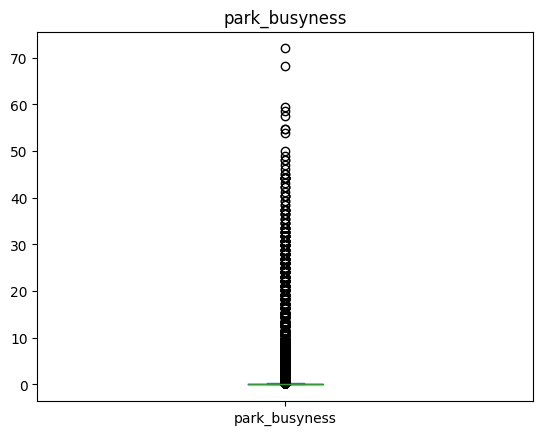

In [ ]:
parks_with_zones_dissolved['park_busyness'].plot(kind='box', title='park_busyness')

In [ ]:
a= parks_with_zones_dissolved[parks_with_zones_dissolved['park_busyness']>50]

In [ ]:
a

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
227895,PK45,Central Park,3.413739e+06,2022,11,21,10,0,False,Autumn,False,71,3.556719e+06,142980.04328,0.9598,68.145801,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
228105,PK45,Central Park,3.413739e+06,2022,12,24,14,5,True,Winter,False,60,3.556719e+06,142980.04328,0.9598,57.588001,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
228183,PK45,Central Park,3.413739e+06,2022,12,9,11,4,False,Winter,False,57,3.556719e+06,142980.04328,0.9598,54.708601,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
228342,PK45,Central Park,3.413739e+06,2022,3,12,10,5,True,Spring,False,56,3.556719e+06,142980.04328,0.9598,53.748801,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
228533,PK45,Central Park,3.413739e+06,2022,4,16,11,5,True,Spring,False,75,3.556719e+06,142980.04328,0.9598,71.985002,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
228558,PK45,Central Park,3.413739e+06,2022,4,20,12,2,False,Spring,False,62,3.556719e+06,142980.04328,0.9598,59.507601,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
229305,PK45,Central Park,3.413739e+06,2022,8,9,10,1,False,Summer,False,61,3.556719e+06,142980.04328,0.9598,58.547801,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
229444,PK45,Central Park,3.413739e+06,2022,9,4,12,6,True,Autumn,False,57,3.556719e+06,142980.04328,0.9598,54.708601,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."


In [ ]:
b=parks_with_zones_dissolved[parks_with_zones_dissolved['park_busyness']>10]

In [ ]:
b

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
95659,PK164,Riverside Park,3.045775e+05,2022,5,19,8,3,False,Spring,False,51,1.478769e+06,1.174192e+06,0.205967,10.504313,166,Morningside Heights,"MULTIPOLYGON (((586352.472 4516575.347, 586361..."
207127,PK31,Battery Park,8.845455e+04,2022,12,19,9,0,False,Winter,False,17,1.011611e+05,1.270659e+04,0.874393,14.864674,12,Battery Park,"POLYGON ((583221.819 4506065.888, 583224.953 4..."
207407,PK31,Battery Park,8.845455e+04,2022,8,8,10,0,False,Summer,False,15,1.011611e+05,1.270659e+04,0.874393,13.115889,12,Battery Park,"POLYGON ((583221.819 4506065.888, 583224.953 4..."
227513,PK45,Central Park,3.413739e+06,2022,1,1,10,5,True,Winter,True,14,3.556719e+06,1.429800e+05,0.959800,13.437200,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
227514,PK45,Central Park,3.413739e+06,2022,1,1,11,5,True,Winter,True,30,3.556719e+06,1.429800e+05,0.959800,28.794001,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229460,PK45,Central Park,3.413739e+06,2022,9,8,15,3,False,Autumn,False,14,3.556719e+06,1.429800e+05,0.959800,13.437200,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
229461,PK45,Central Park,3.413739e+06,2022,9,9,14,4,False,Autumn,False,13,3.556719e+06,1.429800e+05,0.959800,12.477400,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
229462,PK45,Central Park,3.413739e+06,2022,9,9,15,4,False,Autumn,False,22,3.556719e+06,1.429800e+05,0.959800,21.115600,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."
229463,PK45,Central Park,3.413739e+06,2022,9,9,16,4,False,Autumn,False,11,3.556719e+06,1.429800e+05,0.959800,10.557800,43,Central Park,"POLYGON ((588494.920 4516805.518, 588555.476 4..."


In [ ]:
parks_with_zones_id.columns

Index(['park_id', 'park_name', 'park_area', 'year', 'month', 'day', 'hour',
       'day_of_week', 'weekend', 'season', 'isHoliday?', 'taxi_zone_busyness',
       'taxi_zone_area', 'remaining_taxi_zone_area', 'park_proportion',
       'park_busyness', 'taxi_zone_ids', 'taxi_zones', 'geometry'],
      dtype='object')

Check individual duplicates

In [ ]:
# Check for duplicates
duplicates = parks_with_zones_id.duplicated(subset=['park_id', 'year', 'month', 'day', 'hour'], keep=False)
print(parks_with_zones_id[duplicates])


Empty GeoDataFrame
Columns: [park_id, park_name, park_area, year, month, day, hour, day_of_week, weekend, season, isHoliday?, taxi_zone_busyness, taxi_zone_area, remaining_taxi_zone_area, park_proportion, park_busyness, taxi_zone_ids, taxi_zones, geometry]
Index: []


In [ ]:
# Inspect geometries before dissolve
print(parks_with_zones_filtered[parks_with_zones_filtered['park_name'] == 'East River Waterfront Esplanade']['geometry'].unique())



<GeometryArray>
[]
Length: 0, dtype: geometry


In [ ]:
# Inspect geometries after dissolve
print(parks_with_zones_dissolved[parks_with_zones_dissolved['park_name'] == 'East River Waterfront Esplanade']['geometry'].unique())


<GeometryArray>
[]
Length: 0, dtype: geometry


In [ ]:
duplicated_rows = parks_with_zones_dissolved[parks_with_zones_dissolved.duplicated()]

#display duplicate rows
print("Duplicate Rows:")
print(duplicated_rows)

Duplicate Rows:
Empty GeoDataFrame
Columns: [park_id, park_name, park_area, year, month, day, hour, day_of_week, weekend, season, isHoliday?, taxi_zone_busyness, taxi_zone_area, remaining_taxi_zone_area, park_proportion, park_busyness, taxi_zone_ids, taxi_zones, geometry]
Index: []


In [ ]:
parks_with_zones_dissolved['park_name'].value_counts()

park_name
Hells Kitchen Park         2252
Theodore Roosevelt Park    2180
Tecumseh Playground        2180
Grand Army Plaza           2173
Damrosch Park              2171
                           ... 
Wards Island Park           124
Inwood Hill Park             68
Highbridge Park              52
Wallenberg Playground        52
Marble Hill Playground       49
Name: count, Length: 185, dtype: int64

In [ ]:
parks_with_zones_dissolved

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
0,PK101,Inwood Hill Park,784904.717278,2022,1,17,19,0,False,Winter,True,0,9.269065e+05,1.420018e+05,0.846800,0.000000,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK101,Inwood Hill Park,784904.717278,2022,1,20,11,3,False,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
2,PK101,Inwood Hill Park,784904.717278,2022,1,21,18,4,False,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
3,PK101,Inwood Hill Park,784904.717278,2022,1,22,11,5,True,Winter,False,2,9.269065e+05,1.420018e+05,0.846800,1.693601,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
4,PK101,Inwood Hill Park,784904.717278,2022,1,23,12,6,True,Winter,False,1,9.269065e+05,1.420018e+05,0.846800,0.846800,128,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315072,PK98,Howard Bennett Playground,6552.594568,2022,9,9,15,4,False,Autumn,False,3,2.358459e+06,2.351906e+06,0.002778,0.008335,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315073,PK98,Howard Bennett Playground,6552.594568,2022,9,9,16,4,False,Autumn,False,4,2.358459e+06,2.351906e+06,0.002778,0.011113,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315074,PK98,Howard Bennett Playground,6552.594568,2022,9,9,19,4,False,Autumn,False,8,2.358459e+06,2.351906e+06,0.002778,0.022227,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."
315075,PK98,Howard Bennett Playground,6552.594568,2022,9,9,20,4,False,Autumn,False,1,2.358459e+06,2.351906e+06,0.002778,0.002778,42,Central Harlem North,"POLYGON ((589482.657 4518663.311, 589574.947 4..."


#### Debugging

Exploring the data when aggregated

In [ ]:
park_busyness_details= parks_with_zones_dissolved.groupby(['park_id','park_name','geometry'])['park_busyness'].sum().reset_index()

In [ ]:
park_busyness_details.shape

(185, 4)

In [ ]:
# Set the geometry column explicitly
park_busyness_details = gpd.GeoDataFrame(park_busyness_details, geometry='geometry')

In [ ]:
#park_busyness_details.to_file('park_busyness_details_total.geojson',driver='GeoJSON')

In [ ]:
park_busyness_details['park_id'].value_counts()

park_id
PK101    1
PK35     1
PK26     1
PK27     1
PK28     1
        ..
PK170    1
PK171    1
PK172    1
PK173    1
PK98     1
Name: count, Length: 185, dtype: int64

Exploration on Map

In [ ]:
  #column="BoroName",  # make choropleth based on "BoroName" column
    #tooltip="BoroName",  # show "BoroName" value in tooltip (on hover)
    #popup=True,  # show all values in popup (on click)
    #tiles="CartoDB positron",  # use "CartoDB positron" tiles
    #cmap="Set1",  # use "Set1" matplotlib colormap
    #style_kwds=dict(color="black"),  # use black outline

In [ ]:
n= parks_with_zones_dissolved.nunique()
n

park_id                      185
park_name                    185
park_area                    185
year                           1
month                         12
day                           31
hour                          24
day_of_week                    7
weekend                        2
season                         4
isHoliday?                     2
taxi_zone_busyness           125
taxi_zone_area                56
remaining_taxi_zone_area     185
park_proportion              185
park_busyness               7623
taxi_zone_ids                 56
taxi_zones                    56
geometry                     185
dtype: int64

In [ ]:
parks_with_zones_dissolved.isnull().sum()

park_id                     0
park_name                   0
park_area                   0
year                        0
month                       0
day                         0
hour                        0
day_of_week                 0
weekend                     0
season                      0
isHoliday?                  0
taxi_zone_busyness          0
taxi_zone_area              0
remaining_taxi_zone_area    0
park_proportion             0
park_busyness               0
taxi_zone_ids               0
taxi_zones                  0
geometry                    0
dtype: int64

In [ ]:
parks_with_zones_dissolved.shape

(315077, 19)

In [ ]:
i=parks_with_zones_dissolved[parks_with_zones_dissolved['geometry']=='GeometryCollection']
i

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry


In [ ]:
park_busyness_details.geom_type.value_counts()

Polygon               164
MultiPolygon           20
GeometryCollection      1
Name: count, dtype: int64

In [ ]:
park_busyness_details= park_busyness_details[park_busyness_details['park_id']!='PK48']
park_busyness_details

,park_id,park_name,geometry,park_busyness
0,PK101,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4...",76.212024
1,PK102,Irish Hunger Memorial,"POLYGON ((583103.656 4507601.684, 583106.215 4...",75.800076
2,PK103,Isham Park,"POLYGON ((591069.949 4524711.063, 591029.220 4...",37.538910
3,PK104,J. Hood Wright Park,"POLYGON ((589297.156 4522150.813, 589144.554 4...",66.149226
4,PK105,Jackie Robinson Park,"POLYGON ((589416.276 4520386.839, 589415.408 4...",143.872618
...,...,...,...,...
180,PK94,Henry M. Jackson Playground,"POLYGON ((586069.442 4507499.389, 586041.348 4...",11.105143
181,PK95,Highbridge Park,"MULTIPOLYGON (((589333.090 4520596.137, 589335...",56.148933
182,PK96,Hillman Park,"POLYGON ((585941.388 4507646.884, 585948.806 4...",9.961409
183,PK97,Holcombe Rucker Park,"POLYGON ((589782.204 4520253.494, 589629.712 4...",38.469825


In [ ]:
park_busyness_details.explore(column="park_busyness", legend=False)

Debug

Step 1: Inspect Data for Precision Issues

In [ ]:
# Inspect geometries before dissolve
before_dissolve = parks_with_zones_filtered[parks_with_zones_filtered['park_name'] == 'East River Waterfront Esplanade']['geometry'].unique()
for geom in before_dissolve:
    print(geom)



In [ ]:
# Inspect geometries after dissolve
after_dissolve = parks_with_zones_dissolved[parks_with_zones_dissolved['park_name'] == 'East River Waterfront Esplanade']['geometry'].unique()
for geom in after_dissolve:
    print(geom)

In [ ]:
# Verify the result
specific_park = parks_with_zones_dissolved[parks_with_zones_dissolved['park_name'] == 'Battery Park']['geometry'].unique()
for geom in specific_park:
    print(geom)

POLYGON ((583221.8190792096 4506065.888164682, 583224.9528942298 4506064.45783886, 583227.4585562441 4506063.286918707, 583230.3311017115 4506061.798155198, 583225.8406646332 4506054.609203249, 583219.5271932817 4506044.979573471, 583211.7027756429 4506032.202240978, 583202.3825615441 4506015.677872247, 583156.0796048893 4506062.497932814, 583153.7863851566 4506065.070110679, 583119.4745169774 4506101.233588993, 583116.5980210026 4506104.587488446, 583084.5596627067 4506145.25069363, 583083.4872464465 4506146.704153796, 583082.8009599064 4506147.629040084, 583052.0022234129 4506189.294335295, 583050.2949747666 4506191.606652805, 583023.3811805476 4506231.938886365, 583020.3735909234 4506236.445964003, 583007.8937974584 4506256.134560911, 583000.3368196732 4506270.049676718, 582997.9641029069 4506275.207780029, 582995.5126329489 4506281.364184359, 582993.2234156732 4506287.366975773, 582991.3770943768 4506293.05276234, 582989.469288555 4506299.703736791, 582988.3734514313 4506303.255228

In [ ]:
park_with_zones_before_dissolve=parks_with_zones.nunique()
park_with_zones_before_dissolve

park_id                       185
park_name                     185
park_area                     185
geometry                      185
centroid                      185
index_right                 94693
taxi_zone_id                   56
year                            1
month                          12
day                            31
hour                           24
day_of_week                     7
weekend                         2
season                          4
isHoliday?                      2
taxi_zone_busyness            125
taxi_zone                      56
taxi_zone_area                 56
remaining_taxi_zone_area      185
park_proportion               185
park_busyness                7623
dtype: int64

In [ ]:
parks_with_zones_after_dissolve= parks_with_zones_dissolved.nunique()
parks_with_zones_after_dissolve

park_id                      185
park_name                    185
park_area                    185
year                           1
month                         12
day                           31
hour                          24
day_of_week                    7
weekend                        2
season                         4
isHoliday?                     2
taxi_zone_busyness           125
taxi_zone_area                56
remaining_taxi_zone_area     185
park_proportion              185
park_busyness               7623
taxi_zone_ids                 56
taxi_zones                    56
geometry                     185
dtype: int64

Finding unique parks for mapping

In [ ]:
unique_parks = parks_with_zones_dissolved[['park_id', 'park_name','geometry']].drop_duplicates().reset_index(drop=True)

unique_parks


,park_id,park_name,geometry
0,PK101,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK102,Irish Hunger Memorial,"POLYGON ((583103.656 4507601.684, 583106.215 4..."
2,PK103,Isham Park,"POLYGON ((591069.949 4524711.063, 591029.220 4..."
3,PK104,J. Hood Wright Park,"POLYGON ((589297.156 4522150.813, 589144.554 4..."
4,PK105,Jackie Robinson Park,"POLYGON ((589416.276 4520386.839, 589415.408 4..."
...,...,...,...
180,PK94,Henry M. Jackson Playground,"POLYGON ((586069.442 4507499.389, 586041.348 4..."
181,PK95,Highbridge Park,"MULTIPOLYGON (((589333.090 4520596.137, 589335..."
182,PK96,Hillman Park,"POLYGON ((585941.388 4507646.884, 585948.806 4..."
183,PK97,Holcombe Rucker Park,"POLYGON ((589782.204 4520253.494, 589629.712 4..."


In [ ]:
unique_parks.nunique()

park_id      185
park_name    185
geometry     185
dtype: int64

In [ ]:
unique_parks=unique_parks.reset_index(drop=True)


In [ ]:
type(unique_parks)

geopandas.geodataframe.GeoDataFrame

In [ ]:
unique_parks.set_geometry('geometry')

,park_id,park_name,geometry
0,PK101,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK102,Irish Hunger Memorial,"POLYGON ((583103.656 4507601.684, 583106.215 4..."
2,PK103,Isham Park,"POLYGON ((591069.949 4524711.063, 591029.220 4..."
3,PK104,J. Hood Wright Park,"POLYGON ((589297.156 4522150.813, 589144.554 4..."
4,PK105,Jackie Robinson Park,"POLYGON ((589416.276 4520386.839, 589415.408 4..."
...,...,...,...
180,PK94,Henry M. Jackson Playground,"POLYGON ((586069.442 4507499.389, 586041.348 4..."
181,PK95,Highbridge Park,"MULTIPOLYGON (((589333.090 4520596.137, 589335..."
182,PK96,Hillman Park,"POLYGON ((585941.388 4507646.884, 585948.806 4..."
183,PK97,Holcombe Rucker Park,"POLYGON ((589782.204 4520253.494, 589629.712 4..."


In [ ]:
# Convert the 'boundary' geometry column to WKT format
#unique_parks['centroid_wkt'] = unique_parks['centroid'].apply(lambda x: x.wkt)

# Drop the original 'boundary' geometry column
#unique_parks = unique_parks.drop(columns=['centroid'])


In [ ]:
# Set 'park_id' as the new index
#unique_parks = unique_parks.set_index('park_id')

In [ ]:
unique_parks.head(5)

,park_id,park_name,geometry
0,PK101,Inwood Hill Park,"POLYGON ((590396.730 4524639.876, 590282.357 4..."
1,PK102,Irish Hunger Memorial,"POLYGON ((583103.656 4507601.684, 583106.215 4..."
2,PK103,Isham Park,"POLYGON ((591069.949 4524711.063, 591029.220 4..."
3,PK104,J. Hood Wright Park,"POLYGON ((589297.156 4522150.813, 589144.554 4..."
4,PK105,Jackie Robinson Park,"POLYGON ((589416.276 4520386.839, 589415.408 4..."


In [ ]:
#unique_parks.to_file('unique_parks_50%.geojson',driver='GeoJSON',index=False)